In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
X, y = mnist.data, mnist.target

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.base import clone
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, f1_score, recall_score, precision_recall_curve

In [6]:
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [9]:
# y_train_large = (y_train >= '7')
# y_train_odd = (y_train.astype('int8') % 2 == 1)
# y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [11]:
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9676 , 0.9671 , 0.96755])

In [12]:
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [13]:
grid_search = GridSearchCV(knn_clf, param_grid={'n_neighbors': [2,3,4,5,6,7],'weights':('uniform','distance')} )

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7],
                         'weights': ('uniform', 'distance')})

In [14]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [15]:
# Time to spin up a KNN predictor with these hyperparameters
knn_final = KNeighborsClassifier(n_neighbors=4, weights='distance')

knn_final.fit(X_train, y_train)
cross_val_score(knn_final, X_train, y_train, cv=3, scoring="accuracy")

array([0.9709 , 0.9698 , 0.97035])

In [16]:
y_knn_final_pred = cross_val_predict(knn_final, X_train, y_train, cv=3)
f1_score(y_train, y_knn_final_pred, average="macro")

0.9701570373282289

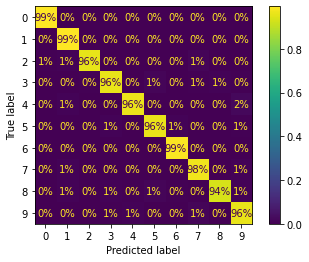

In [17]:
ConfusionMatrixDisplay.from_predictions(y_train, y_knn_final_pred, normalize="true", values_format=".0%")
plt.show()

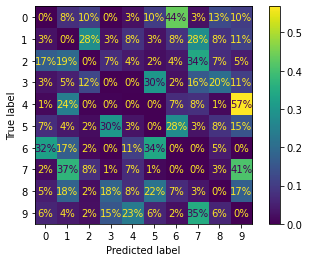

In [19]:
ConfusionMatrixDisplay.from_predictions(y_train, y_knn_final_pred, sample_weight=(y_knn_final_pred != y_train),
                                        normalize="true", values_format=".0%")


plt.show()